### Template for NLP project

The aim of the project is to achieve the following:
 - Train a neural network that is **at least better than random guessing** on your dataset. The template contains the IMDB dataset for sentiment analysis, however, you can choose any other language related data set with the appropriate NLP task.
 - Investigate different neural network architectures (different hyperparameters, different layers, different pre-processing). Explain in the presentation, why the final network was selected! **Do not rely on black-box mechanisms.**
 

In [1]:
# tensorflow modules
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LayerNormalization
from keras.layers import LSTM as ltsm, Bidirectional as bidi
import tensorflow

import matplotlib.pyplot as plt

In [2]:
def load_data(_vocabulary_size): 
    return imdb.load_data(num_words=_vocabulary_size)

def pad_data(_train, _test, _max_words):
    return sequence.pad_sequences(_train, maxlen=_max_words), sequence.pad_sequences(_test, maxlen=_max_words)

In [18]:
vocabulary_size = 5000
max_words = 1000
# vocabulary_size = 10000
# max_words = 2000

embedding_size = 64
# rnn_count = 100
ltsm_dims = 16

activation_func = 'sigmoid'
loss_func= 'binary_crossentropy'
optimizer_func = "adam"

# batch_size = 64
batch_size = 64
# num_epochs = 5
num_epochs = 100

(x_train, y_train), (x_test, y_test) = load_data(vocabulary_size);
x_train_padded, x_test_padded = pad_data(x_train, x_test, max_words)

In [19]:
model=Sequential()

model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))

# model.add(SimpleRNN(rnn_count))
# model.add(bidi(ltsm(ltsm_dims)))       # ltsm_dims=64, epochs=5, 386.433/0 params, 767...947s/epoch -> 0,8619199991226196
# model.add(ltsm(ltsm_dims))             # ltsm_dims=64, epochs=5, 353.217/0 params, 247...264s/epoch -> 0.8602399826049805
# model.add(ltsm(32))                    # ltsm_dims=32, epochs=5, 332.513/0 params, 185...190s/epoch -> 0.8660799860954285
# model.add(ltsm(16))                    # ltsm_dims=16, epochs=5, 325.233/0 params, 185...190s/epoch -> 0.8660799860954285

# ltsm_dims=32, epochs=10, voc/max=10000/2000, batch_size=640, 673.217/0 params, 185...190s/epoch -> 0.8660799860954285
model.add(ltsm(ltsm_dims))                    
model.add(LayerNormalization())

# add layer for output
model.add(Dense(1, activation=activation_func))

# train your model
model.compile(loss=loss_func,  optimizer=optimizer_func, metrics=['accuracy'])

In [20]:
print('Loaded dataset with {} training samples, {} test samples:'.format(len(x_train), len(x_test)))
print('-----------------------------------------------------------------')
# get properties of the dataset
print('Maximum train review length: {}'.format(len(max(x_train, key=len))))
print('Maximum test review length: {}'.format(len(max(x_test, key=len))))
print('Minimum train review length: {}'.format(len(min(x_train, key=len))))
print('Minimum test review length: {}'.format(len(min(x_test, key=len))))
print('-----------------------------------------------------------------')

# print model and check number of parameters
print(model.summary(line_length=100))

Loaded dataset with 25000 training samples, 25000 test samples:
-----------------------------------------------------------------
Maximum train review length: 2494
Maximum test review length: 2315
Minimum train review length: 11
Minimum test review length: 7
-----------------------------------------------------------------
Model: "sequential_2"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 embedding_2 (Embedding)                     (None, 1000, 64)                        320000         
                                                                                                    
 lstm_2 (LSTM)                               (None, 16)                              5184           
                                                                                                    
 layer_normalization_2 (LayerNormalization)  (N

In [21]:
x_validate, y_validate = x_train_padded[:batch_size], y_train[:batch_size]
x_train2, y_train2 = x_train_padded[batch_size:], y_train[batch_size:]

hist = model.fit(x_train2, y_train2, validation_data=(x_validate, y_validate), batch_size=batch_size, epochs=num_epochs)

# check result
scores = model.evaluate(x_test_padded, y_test, verbose=0)
print('Test accuracy:', scores[1])

Epoch 1/100
390/390 [==============================] - 114s 287ms/step - loss: 0.4447 - accuracy: 0.7980 - val_loss: 0.2066 - val_accuracy: 0.9375
Epoch 2/100
390/390 [==============================] - 126s 323ms/step - loss: 0.2903 - accuracy: 0.8934 - val_loss: 0.1924 - val_accuracy: 0.9531
Epoch 3/100
390/390 [==============================] - 156s 397ms/step - loss: 0.2331 - accuracy: 0.9187 - val_loss: 0.2931 - val_accuracy: 0.8906
Epoch 4/100
390/390 [==============================] - 132s 340ms/step - loss: 0.1886 - accuracy: 0.9354 - val_loss: 0.2917 - val_accuracy: 0.9062
Epoch 5/100
390/390 [==============================] - 164s 422ms/step - loss: 0.1620 - accuracy: 0.9456 - val_loss: 0.3123 - val_accuracy: 0.8594
Epoch 6/100
390/390 [==============================] - 124s 318ms/step - loss: 0.1331 - accuracy: 0.9539 - val_loss: 0.2756 - val_accuracy: 0.8906
Epoch 7/100
390/390 [==============================] - 149s 383ms/step - loss: 0.1043 - accuracy: 0.9662 - val_loss: 0

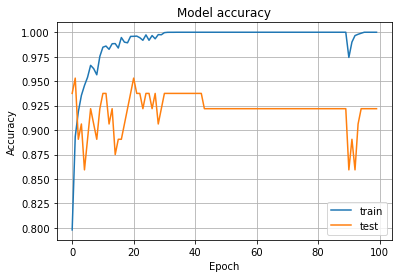

In [25]:
history = hist

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.grid()
plt.show()

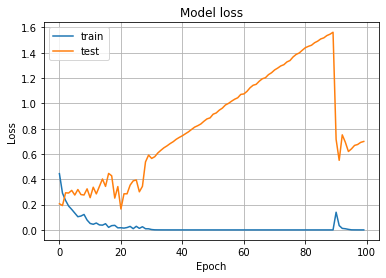

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [26]:
model.save('RNN_TrainResults/wku6262')

INFO:tensorflow:Assets written to: RNN_TrainResults/wku6262\assets


INFO:tensorflow:Assets written to: RNN_TrainResults/wku6262\assets


In [27]:
%pwd

'C:\\Users\\WIKU\\OneDrive - FH Vorarlberg\\06_03_ArtificalIntelligence\\Seminars\\20220531_rnn'